STEP 6: f105w

In [304]:
#basic library imports
import numpy as np
import sep

In [305]:
#setup for reading image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize']=[10.,8.]

In [306]:
image_data=fits.getdata(r'C:\Users\eneto\Desktop\ASTR19\hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits') #read image into 2d numpy array
print(type(image_data)) #show type for image_data
print(image_data.shape)

<class 'numpy.ndarray'>
(3600, 3600)


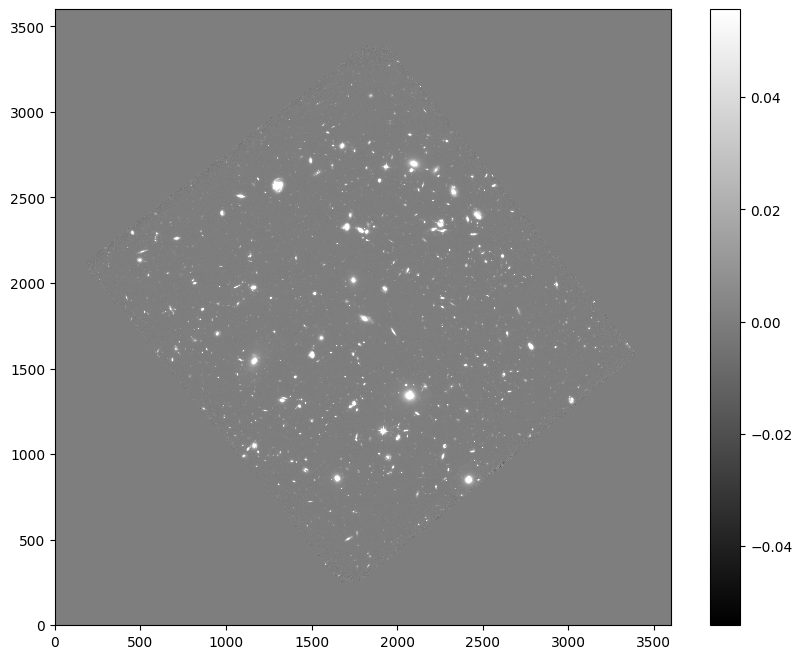

In [307]:
#show image
m,s=np.mean(image_data),np.std(image_data)
plt.imshow(image_data,interpolation='nearest',cmap='gray',vmin=m-s,vmax=m+s,origin='lower')
plt.colorbar()
plt.savefig('f105w.png')

In [308]:
data=image_data.byteswap().newbyteorder() #type swap from HDUList to numpy.ndarray
bkg=sep.Background(data) #get spatially varying background on image

In [309]:
#get mean and noise of image background
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [310]:
bkg_image=bkg.back() #evaluate background as 2d array w/ same size as first image

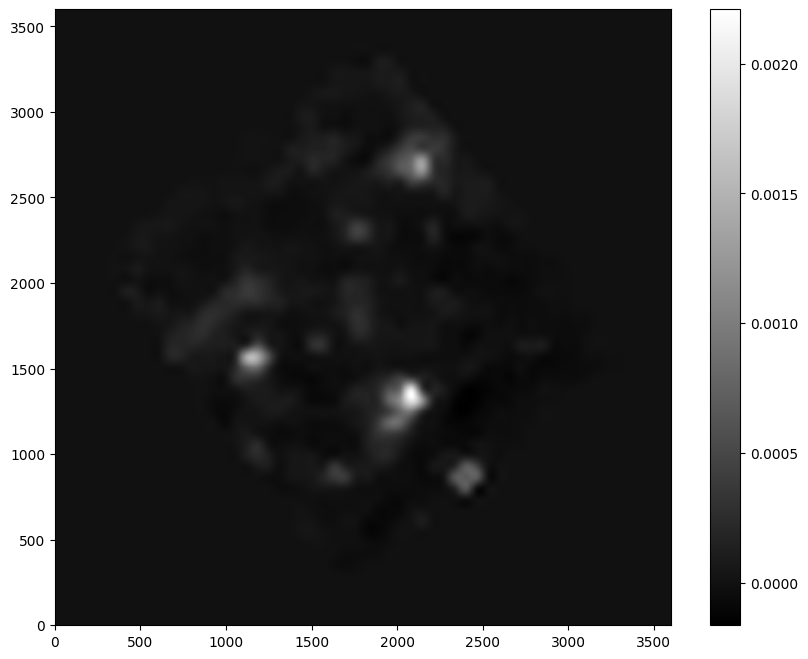

In [311]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower') #show background
plt.colorbar()

In [312]:
bkg_rms=bkg.rms() #evaluate the background noise as 2d array, same size as first image

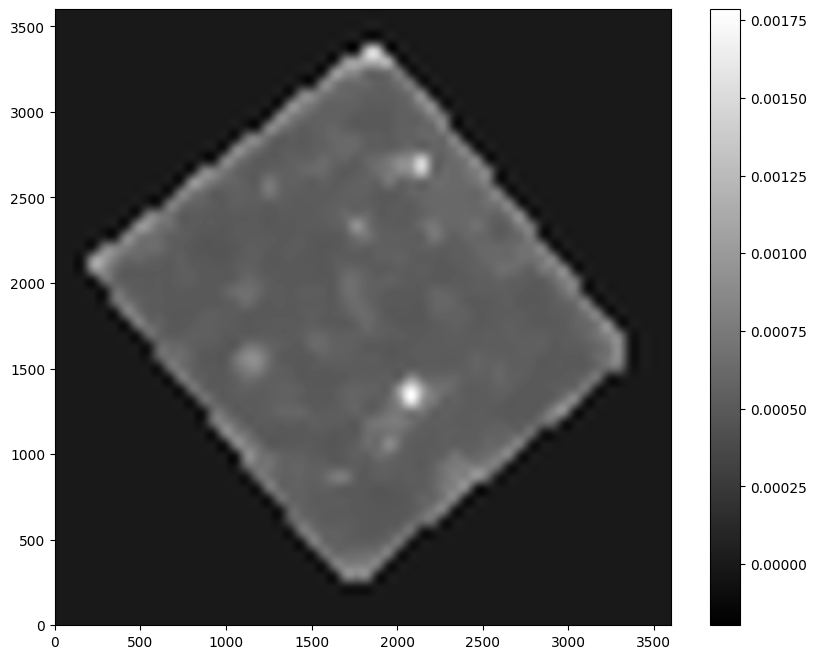

In [313]:
plt.imshow(bkg_rms,interpolation='nearest',cmap='gray',origin='lower') #show background noise
plt.colorbar()

In [314]:
data_sub=data-bkg #subtract background

In [315]:
objects=sep.extract(data_sub,1.5,err=bkg.globalrms)

In [316]:
len(objects) #number of objects detected

8647

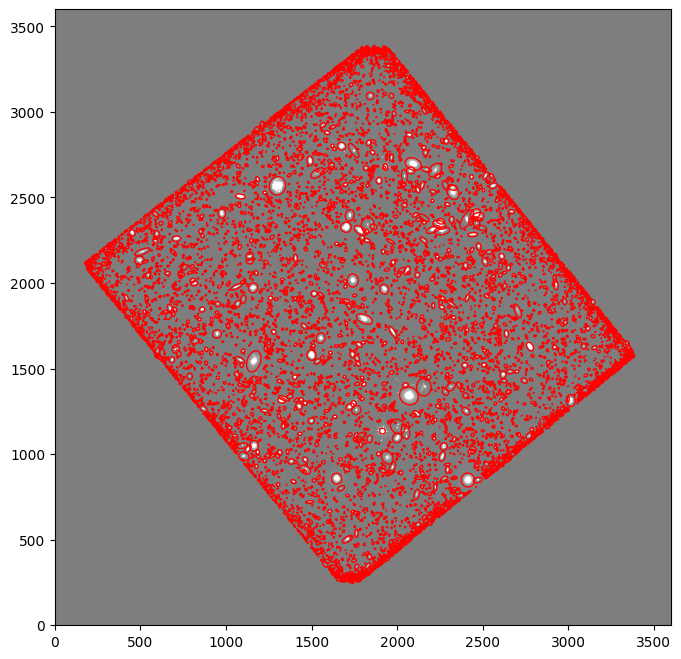

In [317]:
from matplotlib.patches import Ellipse
#plot background-subtracted image
fig,ax=plt.subplots()
m,s=np.mean(data_sub),np.std(data_sub)
im=ax.imshow(data_sub,interpolation='nearest',cmap='gray',vmin=m-s,vmax=m+s,origin='lower')
#plot ellipse for each object
for i in range(len(objects)):
    e=Ellipse(xy=(objects['x'][i],objects['y'][i]),width=6*objects['a'][i],height=6*objects['b'][i],angle=objects['theta'][i]*180./np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [318]:
flux,fluxerr,flag=sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,gain=1.0)

In [319]:
#shows first 10 objects detected
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


STEP 7

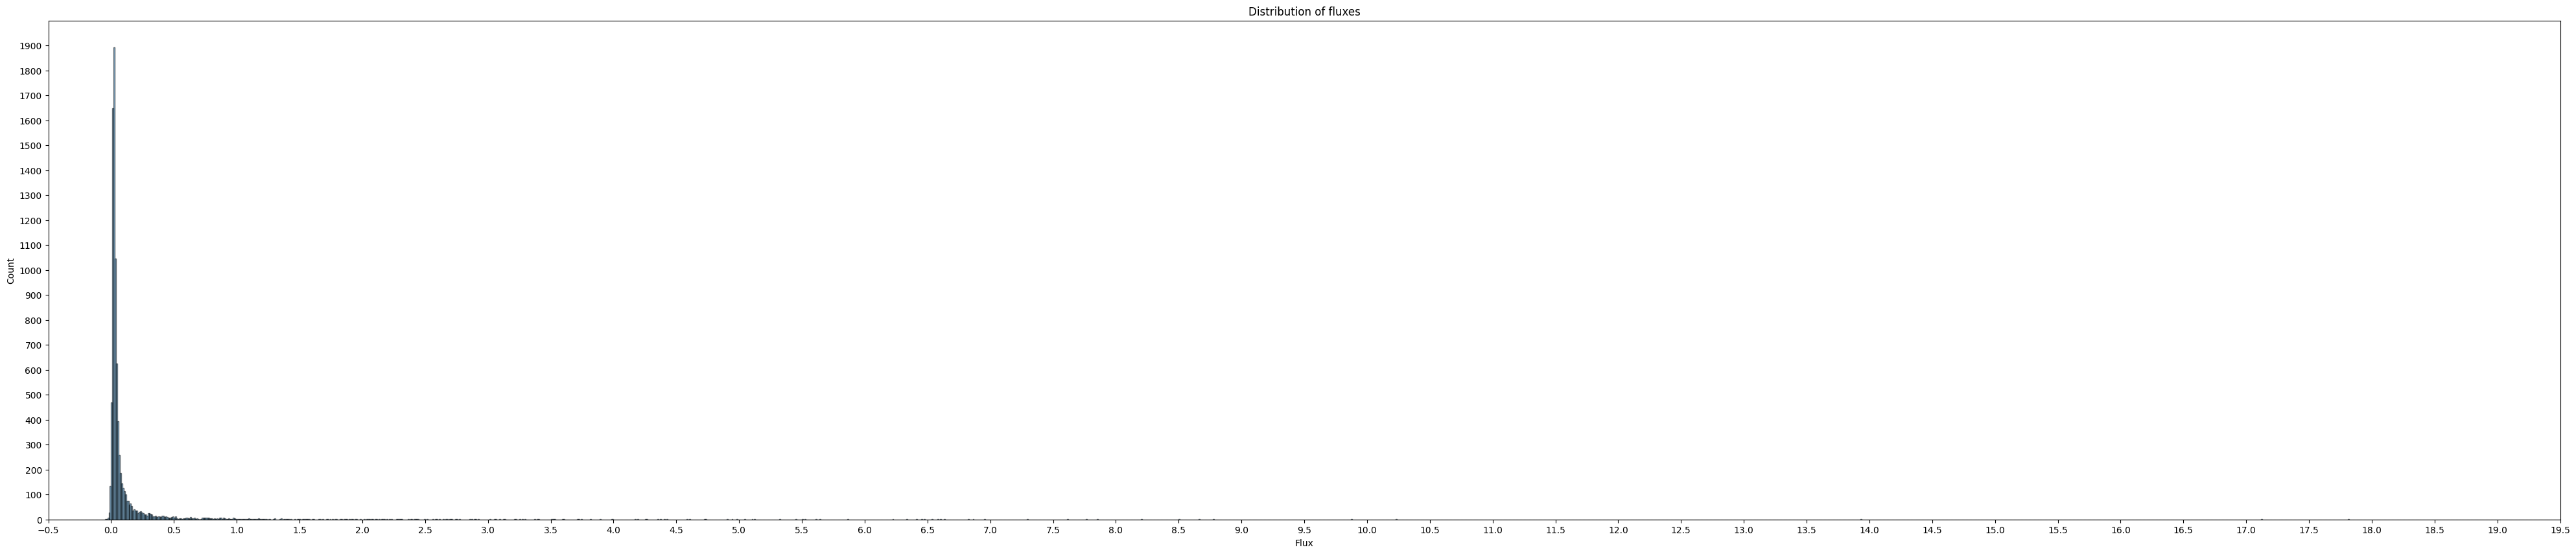

The mean of the distribution of fluxes is 0.36156541841745127.
The median deviation of the distribution of fluxes is 0.030940043033583612.
The standard deviation of the distribution of fluxes is 9.239791506212516.
The largest outlier in the distribution is on the far right, with a flux of approximately 17.6. It is two standard deviations away from the mean.


In [321]:
plt.figure(figsize=(50,10))
width=.01
histmin=np.floor(min(flux))
histmax=np.ceil(max(flux))+width
bins=np.arange(histmin,histmax,width)
plt.hist(flux,bins=bins,alpha=.5,edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Flux')
plt.xlim(m-s,m+s)
plt.ylim(0,2000)
plt.title('Distribution of fluxes')
plt.yticks(ticks=(np.arange(0,2000,100)))
plt.xticks(ticks=(np.arange(-.5,20,.5)))
plt.savefig('hist_f105w.png',bbox_inches='tight',dpi=700)
plt.show()
print(f'The mean of the distribution of fluxes is {np.mean(flux)}.')
print(f'The median deviation of the distribution of fluxes is {np.median(flux)}.')
print(f'The standard deviation of the distribution of fluxes is {np.std(flux)}.')
print('The largest outlier in the distribution is on the far right, with a flux of approximately 17.6. It is two standard deviations away from the mean.')